# Scene: Construction

TODO WIP

## Creating Objects

### Scene

In [1]:
# TODO 
from robotodo.engines.isaac.builders import load_usd_scene

# TODO set up axis
scene = await load_usd_scene(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd",
)

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json'

|---------------------------------------------------------------------------------------------|
| Driver Version: 535.247.01    | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|     |                                  |        |     |            | Bus-ID    |            |
|---------------------------------------------------------------------------------

2025-10-31T01:53:42Z [21,868ms] [Error] [isaacsim.ros2.bridge.impl.extension] ROS2 Bridge startup failed
2025-10-31T01:53:43Z [23,035ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-10-31T01:53:43Z [23,035ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-10-31T01:53:43Z [23,128ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


### Regular Objects

Analytical geometries

In [2]:
from robotodo.utils.pose import Pose
from robotodo.utils.geometry import Box
from robotodo.engines.isaac.entity import Entity, EntityBodyKind
from robotodo.engines.isaac.builders import builder

box = await builder.create(
    geometry=Box(size=[.1, .1, .1]), 
    body_kind=EntityBodyKind.RIGID,
    scene=scene,
)
box.pose = Pose([0, 0, 3])

USD assets

In [3]:
from robotodo.engines.isaac.scene import Scene
from robotodo.engines.isaac.builders import load_urdf, load_usd, build_camera
from robotodo.utils.pose import Pose

mug = await load_usd(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Props/Mugs/SM_Mug_A2.usd",
    scene=scene,
)

mug.collision.enabled = True
mug.pose = Pose(p=[.5, .5, .5])

In [4]:
from robotodo.engines.isaac.builders import builder
from robotodo.engines.isaac.entity import EntityBodyKind

# TODO mass??
builder.reset(mug, body_kind=EntityBodyKind.RIGID)

In [5]:
# TODO instruct users to try:
builder.reset(mug, body_kind=EntityBodyKind.DEFORMABLE_SURFACE)

In [6]:
mug.geometry

[[PolygonMesh(vertices=array([[-9.70949441e-17,  7.41638930e-02,  6.70092377e-02],
         [-1.05145170e-16,  6.79847321e-02,  7.39107497e-02],
         [-8.96764180e-17,  7.71494276e-02,  6.19627748e-02],
         ...,
         [ 2.65790933e-02, -2.00716205e-02,  2.28881831e-07],
         [ 2.83167451e-02, -1.75328918e-02,  2.41994852e-07],
         [ 2.98133271e-02, -1.48454377e-02,  2.46763224e-07]]), face_vertex_counts=array([3, 3, 3, ..., 3, 3, 3], dtype=int32), face_vertex_indices=array([ 131,  490,    0, ..., 2641, 2555, 2556], dtype=int32))]]

In [30]:
mug.viewer.show()

### Robots (Articulations)

In [8]:
panda = await load_usd(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Robots/FrankaRobotics/FrankaPanda/franka.usd",
    scene=scene,
)

In [9]:
# TODO
panda.viewer.show()

In [10]:
from robotodo.engines.isaac.articulation import Articulation

# TODO NOTE this views our imported entity as an articulation
robot_panda = Articulation(path=panda.path, scene=scene)

In [ ]:
robot_panda.root_pose

In [11]:
robot_panda.dof_count

9

In [21]:
robot_panda.dof_positions

tensor([[ 1.1999e-02, -5.6865e-01,  1.9312e-07, -2.8112e+00,  1.5055e-05,
          3.0370e+00,  7.4100e-01,  2.2729e-08,  6.7857e-10]])

In [13]:
robot_panda.dof_names

['panda_joint1',
 'panda_joint2',
 'panda_joint3',
 'panda_joint4',
 'panda_joint5',
 'panda_joint6',
 'panda_joint7',
 'panda_finger_joint1',
 'panda_finger_joint2']

### Sensors

In [14]:
cam = await build_camera(scene=scene)

Module robotodo.engines.isaac.sensors f0dd58f load on device 'cuda:0' took 320.25 ms  (cached)


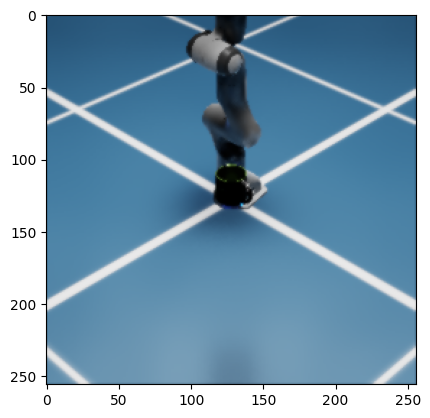

In [15]:
import matplotlib.pyplot as plt

# cam.pose = Pose.from_lookat([1, 1, 1], p_target=[0, 0, 0])
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=robot_panda.link_poses[..., -1].p)
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=mug.pose.p)
cam.pose = Pose.from_lookat([2, 2, 2], p_target=mug.pose.p)
plt.imshow((await cam.read_rgba())[0].cpu())

## Interacting with Objects

In [ ]:
scene.viewer.show()

Auto stepping

In [16]:
scene.autostepping

False

In [18]:
scene.autostepping = True

Manual stepping

In [19]:
await scene.step()

0.016666666666666666

TODO instruct users to play with the UI